# Workshop 2: Accessing Remote Hydrological Data

Accessing data from remote servers is a common task in environmental and climate sciences, where large datasets are often stored on institutional or public repositories. Several tools and protocols are available to facilitate this, depending on the format, structure, and access restrictions of the data. In this notebook we explore some commonly used methods.


[2.1. Manual data downloading](#manual_downloading)

[2.2.   Command line downloading](#cl_downloading)

[2.3.   Data access without downloading](#remote_access)




In [1]:
%%capture
# Installing packages that are required above the ones already installed in Google Colab
!pip install zarr cftime s3fs


In [2]:
# If you are running this notebook in a platform other than Google Colab, please use the following command to install all the required packages.
# This is because Google Colab has some base packages already installed, so for the training session we are only installed other packages we need

#!python -m pip install -r requirements.txt

<a id='manual_downloading'></a>
# 2.1. Manual Data Downloading
Direct data download refers to the process of retrieving datasets from a remote server via a straightforward HTTP, HTTPS, or FTP/SFTP link. This method is commonly used when data are stored as static files (e.g., NetCDF, CSV, GRIB) and made accessible through a direct URL. Users can download files manually through a browser. While this approach is simple and widely supported, it may be less efficient for accessing large datasets or performing repeated queries on multiple files, in which case more advanced methods may be preferable. Some tools are available, such as [Filezilla](https://filezilla-project.org/), for accessing FTP/SFTP servers for bulk downloads.

***Demonstration examples:***

https://environment.data.gov.uk/hydrology/explore

https://portal.grdc.bafg.de/applications/public.html?publicuser=PublicUser#dataDownload/Home


<a id='cl_downloading'></a>
# 2.2. Command Line Downloading

Datasets hosted on remote servers can be downloaded via HTTP, HTTPS, or FTP links using command-line tools in Linux. These methods are especially useful for automating bulk downloads from static URLs. With Linux shell scripting, such downloads can also be parallelised to efficiently handle multiple files simultaneously. This method downloads the full data available via the link being used, and cannot download a subset of data.

***Demonstration examples:***

https://catalogue.ceh.ac.uk/documents/dbf13dd5-90cd-457a-a986-f2f9dd97e93c

https://www.ncei.noaa.gov/pub/data/


*Note: The ! operator in Python-based Jupyter Notebooks allows users to execute Linux shell commands directly from within the notebook, effectively stepping out of the Python environment to run system-level commands.*

### (i) Downloading single file

In [3]:
!wget https://catalogue.ceh.ac.uk/datastore/eidchub/dbf13dd5-90cd-457a-a986-f2f9dd97e93c/GB/monthly/CEH_GEAR_monthly_GB_1894.nc

--2025-07-03 08:36:43--  https://catalogue.ceh.ac.uk/datastore/eidchub/dbf13dd5-90cd-457a-a986-f2f9dd97e93c/GB/monthly/CEH_GEAR_monthly_GB_1894.nc
Resolving catalogue.ceh.ac.uk (catalogue.ceh.ac.uk)... 192.171.173.174
Connecting to catalogue.ceh.ac.uk (catalogue.ceh.ac.uk)|192.171.173.174|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 168418060 (161M) [application/x-netcdf]
Saving to: ‘CEH_GEAR_monthly_GB_1894.nc’

CEH_GEAR_monthly_GB 100%[===================>] 160.62M  15.0MB/s    in 12s     

2025-07-03 08:36:55 (13.3 MB/s) - ‘CEH_GEAR_monthly_GB_1894.nc’ saved [168418060/168418060]



In [4]:
# For now we are deleting the data
!rm CEH_GEAR_monthly_GB_1894.nc

### (ii) Downloading restricted data

In [5]:
# To use wget for multiple files or even ftp servers which are linked to your account and password protected you can use the following version
# For detailed example of accessing servers with password protection please see: https://eidc.ac.uk/help/getdata/downloadData
# Add your own username and password to download the whole catalogue.
# Please do not try this during the training session as it would take a lot time and storage space.

!wget --user=YOUR_USERNAME --password=YOUR_PASSWORD --auth-no-challenge https://catalogue.ceh.ac.uk/datastore/eidchub/dbf13dd5-90cd-457a-a986-f2f9dd97e93c

--2025-07-03 08:36:56--  https://catalogue.ceh.ac.uk/datastore/eidchub/dbf13dd5-90cd-457a-a986-f2f9dd97e93c
Resolving catalogue.ceh.ac.uk (catalogue.ceh.ac.uk)... 192.171.173.174
Connecting to catalogue.ceh.ac.uk (catalogue.ceh.ac.uk)|192.171.173.174|:443... connected.
HTTP request sent, awaiting response... 401 

Username/Password Authentication Failed.


### (iii) Downloading multiple files

In [6]:
# Multiple files can be available to us sometimes in compressed format like the following
!wget https://www.ncei.noaa.gov/pub/data/hourly_precip-3240/01/3240_01_1948-1998.tar.Z

--2025-07-03 08:36:56--  https://www.ncei.noaa.gov/pub/data/hourly_precip-3240/01/3240_01_1948-1998.tar.Z
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.177, 205.167.25.172, 205.167.25.178, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2812415 (2.7M) [application/x-tar]
Saving to: ‘3240_01_1948-1998.tar.Z’

3240_01_1948-1998.t 100%[===================>]   2.68M  4.39MB/s    in 0.6s    

2025-07-03 08:36:57 (4.39 MB/s) - ‘3240_01_1948-1998.tar.Z’ saved [2812415/2812415]



In [7]:
%%capture
# There are command line methods to uncompress the datasets
!tar -zxvf 3240_01_1948-1998.tar.Z

In [8]:
# For now we are deleting the data
!rm 3240_*

In [9]:
# To download multiple files via wget, you can use a txt file that has a list of the URLs
# First as an example we create a txt file with urls we want to download
url_list = ['https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1951/01/prcp-195101-cen-scaled.csv',
            'https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1952/01/prcp-195201-cen-scaled.csv']

with open("urls.txt", "w") as outfile:
    outfile.write("\n".join(url_list))

# Then use the text file with the URL list to download multiple files
!wget -i urls.txt

--2025-07-03 08:36:58--  https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1951/01/prcp-195101-cen-scaled.csv
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.177, 205.167.25.172, 205.167.25.178, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26279757 (25M) [text/csv]
Saving to: ‘prcp-195101-cen-scaled.csv’

prcp-195101-cen-sca 100%[===================>]  25.06M  21.5MB/s    in 1.2s    

2025-07-03 08:37:00 (21.5 MB/s) - ‘prcp-195101-cen-scaled.csv’ saved [26279757/26279757]

--2025-07-03 08:37:00--  https://www.ncei.noaa.gov/pub/data/daily-grids/beta/by-month/1952/01/prcp-195201-cen-scaled.csv
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.177|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26279757 (25M) [text/csv]
Saving to: ‘prcp-195201-cen-scaled.csv’

prcp-195201-cen-sca 100%[===================>]  25.06M  20.1MB/s    

In [10]:
# For now we are deleting the data

!rm prcp* urls.txt

<a id='remote_access'></a>
# 2.3. Access Without Downloading

Hydroclimate data can be accessed remotely without downloading entire datasets. Multiple platforms allow users to query, subset, and stream data directly into analysis environments such as Python, R, or MATLAB. Some methods, such as APIs and FTP/HTTP access, support dynamic data slicing using query parameters. However, remote data access more broadly enables scalable, on-demand computing by allowing users to process and analyze data without the need for local storage. Such remote access methods are increasingly critical for handling the growing volume of high-resolution climate data.

## 2.3.1. Data Access Protocols/Servers

These are servers that mostly designed to host/access large multidimensional scientific datasets (e.g., NetCDF or HDF formats) but are not suitable for other formats like CSV or JSON. Some types of these servers are: THREDDS (Thematic Real-time Environmental Distributed Data Services); OPeNDAP (Open-source Project for a Network Data Access Protocol). These can be accessed via scientific tools/libraries (e.g., xarray, netCDF4, nccopy, Panoply) or protocols like OPeNDAP allow client-side access via URLs (wget). There is some flexibility for accessing subset of data but no functionality for filtering by metadata or aggregation.

***Demonstration examples:***

https://www.nccs.nasa.gov/services/data-collections/land-based-products/nex-gddp-cmip6

https://ds.nccs.nasa.gov/thredds/catalog/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/catalog.html


In [11]:
# For using wget the URL is usually different than the URL used for the direct access using Python.
# In this example you can use the HTTPServer URL to directly download the while file without any subsetting
# https://ds.nccs.nasa.gov/thredds/catalog/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/catalog.html?dataset=AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc

#!wget https://ds.nccs.nasa.gov/thredds/fileServer/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc
#!rm pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc

# These servers give some functionality to subset the data before downloading the file
# In this example you can use the NetcdfServer URL to subset the data before downloading
# -O flag in wget allows you to rename the file you are downloading
!wget -O test.nc "https://ds.nccs.nasa.gov/thredds/ncss/grid/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc?var=pr&north=40&west=66&east=100&south=8&horizStride=1&time=1950-12-31T12:00:00Z&&accept=netcdf3"

--2025-07-03 08:37:01--  https://ds.nccs.nasa.gov/thredds/ncss/grid/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_1950_v1.1.nc?var=pr&north=40&west=66&east=100&south=8&horizStride=1&time=1950-12-31T12:00:00Z&&accept=netcdf3
Resolving ds.nccs.nasa.gov (ds.nccs.nasa.gov)... 169.154.151.145, 2001:4d0:2418:2800::a99a:9791
Connecting to ds.nccs.nasa.gov (ds.nccs.nasa.gov)|169.154.151.145|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 76012 (74K) [application/x-netcdf]
Saving to: ‘test.nc’

test.nc             100%[===================>]  74.23K  --.-KB/s    in 0.1s    

2025-07-03 08:37:02 (497 KB/s) - ‘test.nc’ saved [76012/76012]



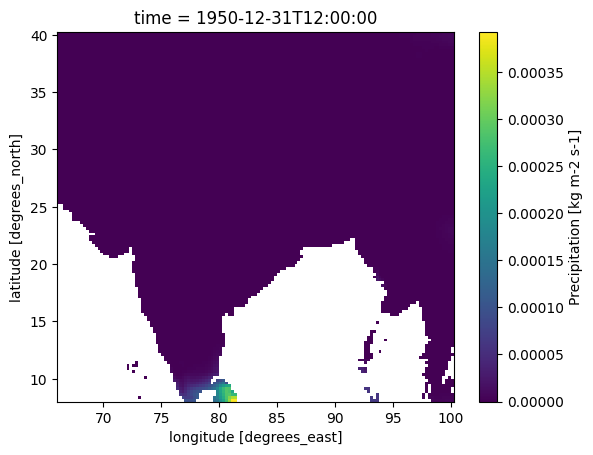

In [12]:
# Reading in the downloaded data to check if it looks okay
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
# For plotting the data in the notebook
%matplotlib inline

f = xr.open_dataset("test.nc")
f['pr'][0].plot()

In [13]:
!rm test.nc

In [14]:
xr.open_dataset('https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_2010_v1.1.nc')

FileNotFoundError: https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_2010_v1.1.nc

In [15]:
#identified base URL from the site, clicked on the file and it leads to a page which gives you the openDAP link, copied using right click
#created a generic file name so that we can replace the years and loop for reading multiple files at once

base_url = 'https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_'
years = range(2010, 2012)  # Adjust the range as needed

file_urls = [f"{base_url}{year}_v1.1.nc" for year in years]
file_urls

['https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_2010_v1.1.nc',
 'https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_2011_v1.1.nc']

In [16]:
ds = xr.open_mfdataset(file_urls, combine='by_coords')
ds

FileNotFoundError: https://ds.nccs.nasa.gov/thredds/dodsC/AMES/NEX/GDDP-CMIP6/MIROC6/historical/r1i1p1f1/pr/pr_day_MIROC6_historical_r1i1p1f1_gn_2010_v1.1.nc

In [17]:
pr = ds.pr.sel(lat=slice(8, 40), lon=slice(66, 100))
pr[0].plot()

NameError: name 'ds' is not defined

## 2.3.2. APIs (Application Programming Interfaces)
Now a days, many data providers offer RESTful APIs that allow users to query and retrieve data programmatically. APIs are powerful for accessing dynamic content, filtering by time, location, or variable, and automating data workflows. The filtering can easily be done using Python scripts.

***Demonstration examples:***

Climate Data Store: https://cds.climate.copernicus.eu/datasets/derived-era5-single-levels-daily-statistics?tab=overview

[COSMOS](https://www.ceh.ac.uk/our-science/projects/cosmos-uk) API: https://cosmos-api.ceh.ac.uk/docs

Accessing Station Observations
We will be accessing observed variable of Daily Maximum Temperature Air (TA_MAX) from 2016--2022 for one of the COSMOS station (ALIC1) directly from COSMOS API

### (i) Importing required packages

In [18]:
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import io
import json
import requests
import zipfile
import matplotlib.pyplot as plt

### (ii) Pre-written functions

In [19]:
# Pre-written functions are genereally give on the API webpage
# Here we are using these for accessing COSMOS data.
# Please see https://cosmos-api.ceh.ac.uk/python_examples for code examples
# Please see https://cosmos-api.ceh.ac.uk/docs for more details


def get_api_response(url, csv=False):
    """Helper function to send request to API and get the response

    :param str url: The URL of the API request
    :param bool csv: Whether this is a CSV request. Default False.
    :return: API response
    """
    # Send request and read response
    print(url)
    response = requests.get(url)

    if csv:
        return response
    else:
        # Decode from JSON to Python dictionary
        return json.loads(response.content)


def get_collection_parameter_info(params):
    """A function for wrangling the collection information into a more visually appealing format!"""
    df = pd.DataFrame.from_dict(params)
    df = df.T[["label", "description", "unit", "sensorInfo"]]

    df["unit_symbol"] = df["unit"].apply(lambda x: x["symbol"]["value"])
    df["unit_label"] = df["unit"].apply(lambda x: x["label"])
    df["sensor_depth"] = df["sensorInfo"].apply(
        lambda x: None if pd.isna(x) else x["sensor_depth"]["value"]
    )

    df = df.drop(["sensorInfo", "unit"], axis=1)

    return df


def format_datetime(dt):
    return dt.strftime("%Y-%m-%dT%H:%M:%SZ")


def read_json_collection_data(json_response):
    """Wrangle the response JSON from a COSMOS-API data collection request into a more usable format - in this case a Pandas Dataframe

    :param dict json_response: The JSON response dictionary returned from a COSMOS-API data collection request
    :return: Dataframe of data
    :rtype: pd.DataFrame
    """
    # The response is a list of dictionaries, one for each requested site

    # You can choose how you want to build your dataframes.  Here, I'm just loading all stations into one big dataframe.
    # But you could modify this for your own use cases.  For example you might want to build a dictionary of {site_id: dataframe}
    # to keep site data separate, etc.
    master_df = pd.DataFrame()

    for site_data in resp["coverages"]:
        # Read the site ID
        site_id = site_data["dct:identifier"]

        # Read the time stamps of each data point
        time_values = pd.DatetimeIndex(site_data["domain"]["axes"]["t"]["values"])

        # Now read the values for each requested parameter at each of the time stamps
        param_values = {
            param_name: param_data["values"]
            for param_name, param_data in site_data["ranges"].items()
        }

        # And put everything into a dataframe
        site_df = pd.DataFrame.from_dict(param_values)
        site_df["datetime"] = time_values
        site_df["site_id"] = site_id

        site_df = site_df.set_index(["datetime", "site_id"])
        master_df = pd.concat([master_df, site_df])

    return master_df

### (iii) Accessing Station Observations

In [20]:
# We need to extract "ta_max" parameter for COSMOS station "ALIC1" over the period of 2016 -- 2022
start_date = format_datetime(datetime(2016, 1, 1))
end_date = format_datetime(datetime(2022, 12, 31))
query_date_range = f"{start_date}/{end_date}"
param_name = [
    "ta_max",
]
site_nm = "ALIC1"

In [21]:
# First we get the metadata for the COSMOS station
BASE_URL = "https://cosmos-api.ceh.ac.uk"
site_info_url = f"{BASE_URL}/collections/1D/locations"
site_info_response = get_api_response(site_info_url)

site_info = {}
for site in site_info_response["features"]:
    site_id = site["id"]
    site_name = site["properties"]["label"]
    coordinates = site["geometry"]["coordinates"]
    date_range = site["properties"]["datetime"]
    start_date, end_date = date_range.split("/")

    other_info = site["properties"]["siteInfo"]
    other_info = {key: d["value"] for key, d in other_info.items()}

    site_info[site_id] = {
        "site_name": site_name,
        "coordinates": coordinates,
        "start_date": start_date,
        "end_date": end_date,
    } | other_info

site_info_df = pd.DataFrame.from_dict(site_info).T
s_df = site_info_df[site_info_df.index == site_nm]
s_df

https://cosmos-api.ceh.ac.uk/collections/1D/locations


site_name             coordinates            start_date  \
ALIC1  Alice Holt  [51.153551, -0.858232]  2015-03-06T13:30:00Z   

                   end_date altitude bulk_density bulk_density_sd  \
ALIC1  2025-07-02T00:00:00Z     80.0         0.84            None   

               land_cover lattice_water lattice_water_sd soil_organic_carbon  \
ALIC1  Broadleaf woodland         0.025             None               0.042   

      soil_organic_carbon_sd     soil_type  
ALIC1                   None  Mineral soil

In [22]:
# Extracting the COSMOS station latitude and longitude from the whole metadata list
# COSMOS station latitude and longitude is required to calculate the nearest grid point on the CHESS grid to extract corresponding model data
site_latitude = s_df["coordinates"][0][0]
site_longitude = s_df["coordinates"][0][1]
print(
    "COMOS Site "
    + site_nm
    + " Latitude: "
    + str(site_latitude)
    + " Longitude: "
    + str(site_longitude)
)

COMOS Site ALIC1 Latitude: 51.153551 Longitude: -0.858232


/tmp/ipython-input-22-733139797.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  site_latitude = s_df["coordinates"][0][0]
/tmp/ipython-input-22-733139797.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  site_longitude = s_df["coordinates"][0][1]


In [23]:
# Extracting COSMOS TA_MAX data for the station over the required period into a pandas dataframe
query_url = f'{BASE_URL}/collections/1D/locations/{site_nm}?datetime={query_date_range}&parameter-name={",".join(param_name)}'
resp = get_api_response(query_url)
df = read_json_collection_data(resp)
df = df.reset_index()
display(df)
print(df.shape)

https://cosmos-api.ceh.ac.uk/collections/1D/locations/ALIC1?datetime=2016-01-01T00:00:00Z/2022-12-31T00:00:00Z&parameter-name=ta_max


datetime site_id  ta_max
0    2016-01-01 00:00:00+00:00   ALIC1     8.6
1    2016-01-02 00:00:00+00:00   ALIC1    10.7
2    2016-01-03 00:00:00+00:00   ALIC1     8.9
3    2016-01-04 00:00:00+00:00   ALIC1     9.6
4    2016-01-05 00:00:00+00:00   ALIC1     8.2
...                        ...     ...     ...
2552 2022-12-27 00:00:00+00:00   ALIC1    10.3
2553 2022-12-28 00:00:00+00:00   ALIC1    11.4
2554 2022-12-29 00:00:00+00:00   ALIC1     9.7
2555 2022-12-30 00:00:00+00:00   ALIC1    12.6
2556 2022-12-31 00:00:00+00:00   ALIC1    13.4

[2557 rows x 3 columns]

(2557, 3)


In [24]:
# Calculating monthly climatological values of TA_MAX for the station over 2016--2022
df_site = (
    df.groupby(pd.PeriodIndex(df["datetime"], freq="M"))["ta_max"].mean().reset_index()
)
df_site["datetime"] = df_site.datetime.dt.to_timestamp()
df_site = df_site.groupby(df_site["datetime"].dt.month).mean("ta_max")
df_site

ta_max
datetime           
1          7.476959
2          8.877840
3         10.683410
4         13.541429
5         17.068664
6         19.837143
7         21.745315
8         21.484300
9         18.770476
10        14.840553
11        10.642857
12         8.679247

## 2.3.3. Cloud Storage Access

Many datasets are now being hosted in cloud storages, especially for large-scale earth observation data. Tools like AWS CLI, boto3 (Python), gsutil, or cloud-native file systems (e.g., s3fs, gcsfs) allow seamless access to cloud-hosted data. Examples are AWS S3, Google Cloud Storage, Azure.

**OTHER RESOURCES:**
1. https://github.com/NERC-CEH/object_store_tutorial:
This is a GitHub respository with an extensive guide for utilizing object storage.
2. To hear more about "JASMIN Object Storage: Optimizing Performance for Climate Research" please see video https://www.youtube.com/watch?v=xJ8qEXQAri0&list=PLhF74YhqhjqnXvjzFCKnw4TGAFnkVu7Qn&index=2 from  JASMIN Conference 2023.

***Demonstration examples:***

Here we will demonstrate data access from JASMIN Object Store which is AWS S3. We will be accessing CHESS-SCAPE data that has been stored in the JASMIN Object Store tenancy and made open-access to all. For more information about CHESS-SCAPE data, please see https://catalogue.ceda.ac.uk/uuid/8194b416cbee482b89e0dfbe17c5786c. We will be extracting the Daily Maximum Surface Air Temperature (TASMAX) at the grid point nearest to the COSMOS Station ALIC1 for the period 2016--2022 for all ensemble members available.

### (i) Importing required packages

In [25]:
import fsspec
import s3fs
import zarr
import xarray as xr

### (ii) Exploring the data in Object Store

In [26]:
# s3fs is a python package that allows you to not only read the data but also explore the tenancy (chess-scape-o)
# Here we will be using s3fs to list the bucket and not read the data, we read the data using intake package shown below
# For more information please see: https://pypi.org/project/s3fs/
s3 = s3fs.S3FileSystem(anon=True, client_kwargs={'endpoint_url': "https://chess-scape-o.s3-ext.jc.rl.ac.uk"})
s3.ls('s3://ens01-year100kmchunk/')
# In the output you see that within in the chess-scape-o tenancy, a bucket called ens01-year100kmchunk
# has 10 different zarr files for different 10 different variables. This is for a single chunk type tested.

['ens01-year100kmchunk/hurs_01_year100km.zarr',
 'ens01-year100kmchunk/huss_01_year100km.zarr',
 'ens01-year100kmchunk/pr_01_year100km.zarr',
 'ens01-year100kmchunk/psurf_01_year100km.zarr',
 'ens01-year100kmchunk/rlds_01_year100km.zarr',
 'ens01-year100kmchunk/rsds_01_year100km.zarr',
 'ens01-year100kmchunk/sfcWind_01_year100km.zarr',
 'ens01-year100kmchunk/tmax_01_year100km.zarr',
 'ens01-year100kmchunk/tmean_01_year100km.zarr',
 'ens01-year100kmchunk/tmin_01_year100km.zarr']

### (iii) Accessing data and the associated metadata

In [27]:
# We are accessing TASMAX for the Ensemble member #01 from the catalogue
fs = fsspec.filesystem("s3", asynchronous=True, anon=True, endpoint_url="https://chess-scape-o.s3-ext.jc.rl.ac.uk")
zstore = zarr.storage.FsspecStore(fs, path="ens01-year100kmchunk/tmax_01_year100km.zarr")
chess_data_01 = xr.open_zarr(zstore, decode_times=True, decode_cf=True)
chess_data_01

/tmp/ipython-input-27-2096036494.py:4: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  chess_data_01 = xr.open_zarr(zstore, decode_times=True, decode_cf=True)


<xarray.Dataset> Size: 100GB
Dimensions:  (y: 1057, x: 656, time: 36000)
Coordinates:
  * time     (time) object 288kB 1980-12-01 12:00:00 ... 2080-11-30 12:00:00
  * x        (x) float32 3kB 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
  * y        (y) float32 4kB 500.0 1.5e+03 2.5e+03 ... 1.056e+06 1.056e+06
Data variables:
    lat      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    tasmax   (time, y, x) float32 100GB dask.array<chunksize=(360, 100, 100), meta=np.ndarray>
    lon      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    NCO:          4.7.3
    contact:      emrobi@ceh.ac.uk
    history:      Fri Mar 19 15:18:41 2021: cdo --sortname -add /gws/nopw/j04...
    institution:  CEH Wallingford - NERC
    project:      UK-SCAPE: SPEED

In [28]:
# CHESS-SCAPE is on the British National Grid with Easting and Northing Coordinates.
# We also set the latitude and longitude as coordinates
chess_data_01 = chess_data_01.set_coords(("lat", "lon"))
chess_data_01

<xarray.Dataset> Size: 100GB
Dimensions:  (y: 1057, x: 656, time: 36000)
Coordinates:
    lat      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
  * time     (time) object 288kB 1980-12-01 12:00:00 ... 2080-11-30 12:00:00
    lon      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
  * x        (x) float32 3kB 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
  * y        (y) float32 4kB 500.0 1.5e+03 2.5e+03 ... 1.056e+06 1.056e+06
Data variables:
    tasmax   (time, y, x) float32 100GB dask.array<chunksize=(360, 100, 100), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    NCO:          4.7.3
    contact:      emrobi@ceh.ac.uk
    history:      Fri Mar 19 15:18:41 2021: cdo --sortname -add /gws/nopw/j04...
    institution:  CEH Wallingford - NERC
    project:      UK-SCAPE: SPEED

In [29]:
# Slicing for the time period 2016--2022
chess_data_01 = chess_data_01["tasmax"].sel(time=slice("2016-01-01", "2022-12-30"))
chess_data_01

<xarray.DataArray 'tasmax' (time: 2520, y: 1057, x: 656)> Size: 7GB
dask.array<getitem, shape=(2520, 1057, 656), dtype=float32, chunksize=(360, 100, 100), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
  * time     (time) object 20kB 2016-01-01 12:00:00 ... 2022-12-30 12:00:00
    lon      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
  * x        (x) float32 3kB 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
  * y        (y) float32 4kB 500.0 1.5e+03 2.5e+03 ... 1.056e+06 1.056e+06
Attributes:
    long_name:      Maximum air temperature
    standard_name:  air_temperature
    units:          K

In [30]:
%%capture
# Extracting data for the other ensemble members
# Ensemble member #04
zstore = zarr.storage.FsspecStore(fs, path="ens04-year100kmchunk/tmax_04_year100km.zarr")
chess_data_04 = xr.open_zarr(zstore, decode_times=True, decode_cf=True)
chess_data_04 = chess_data_04.set_coords(("lat", "lon"))
chess_data_04 = chess_data_04["tasmax"].sel(time=slice("2016-01-01", "2022-12-30"))

# Ensemble member #06
zstore = zarr.storage.FsspecStore(fs, path="ens06-year100kmchunk/tmax_06_year100km.zarr")
chess_data_06 = xr.open_zarr(zstore, decode_times=True, decode_cf=True)
chess_data_06 = chess_data_06.set_coords(("lat", "lon"))
chess_data_06 = chess_data_06["tasmax"].sel(time=slice("2016-01-01", "2022-12-30"))

# Ensemble member #15
zstore = zarr.storage.FsspecStore(fs, path="ens15-year100kmchunk/tmax_15_year100km.zarr")
chess_data_15 = xr.open_zarr(zstore, decode_times=True, decode_cf=True)
chess_data_15 = chess_data_15.set_coords(("lat", "lon"))
chess_data_15 = chess_data_15["tasmax"].sel(time=slice("2016-01-01", "2022-12-30"))

/tmp/ipython-input-30-3253356882.py:4: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  chess_data_04 = xr.open_zarr(zstore, decode_times=True, decode_cf=True)
/tmp/ipython-input-30-3253356882.py:10: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consol

### (iv) Deriving the Observed Station nearest grid point on the Gridded Dataset

In [31]:
# Function to derive the data for the nearest grid point to the station lat lon
def find_chess_tile(lat, lon, latlon_ref):
    """
    Created by Doran Khamis (dorkha@ceh.ac.uk)
    Function to calculate the nearest grid point
    of a given lat lon value within a gridded dataset
    The input data is the latitude, longitude of the station
    and the grid reference (latlon_ref) of the gridded dataset
    The function returns the y and x index for the gridded dataset
    which can be used to derive the nearest grid point
    This function assumes equal length lat/lon vectors in latlon_ref
    """
    dist_diff = np.sqrt(
        np.square(latlon_ref.lat.values - lat) + np.square(latlon_ref.lon.values - lon)
    )
    chesstile_yx = np.where(dist_diff == np.min(dist_diff))
    return chesstile_yx

In [32]:
# We create a temporary CHESS-SCAPE gridded dataset array
chess_tmp = chess_data_01[0, :, :]
chess_tmp

<xarray.DataArray 'tasmax' (y: 1057, x: 656)> Size: 3MB
dask.array<getitem, shape=(1057, 656), dtype=float32, chunksize=(100, 100), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
    time     object 8B 2016-01-01 12:00:00
    lon      (y, x) float32 3MB dask.array<chunksize=(100, 100), meta=np.ndarray>
  * x        (x) float32 3kB 500.0 1.5e+03 2.5e+03 ... 6.545e+05 6.555e+05
  * y        (y) float32 4kB 500.0 1.5e+03 2.5e+03 ... 1.056e+06 1.056e+06
Attributes:
    long_name:      Maximum air temperature
    standard_name:  air_temperature
    units:          K

In [33]:
# Extracting the x and y indices which point to the nearest grid point of the COSMOS station
y, x = find_chess_tile(site_latitude, site_longitude, chess_tmp)
print(y,x)

[140] [479]


In [34]:
# Deleting the temporary array
del chess_tmp

### (v) Extracting the model ensemble data for the grid point nearest to the observed station

In [35]:
# Creating arrays for day, month and year from the time index
day = np.array([i.day for i in chess_data_01.time.values])
month = np.array([i.month for i in chess_data_01.time.values])
year = np.array([i.year for i in chess_data_01.time.values])

In [36]:
# Indexing the CHESS-SCAPE data with the x and y coordinates nearest to the observed station
ens = ["ENS01", "ENS04", "ENS06", "ENS15"]
chess_site_data = np.zeros((len(ens), len(day)))
chess_site_data[0, :] = chess_data_01[:, y, x].squeeze().values
chess_site_data[1, :] = chess_data_04[:, y, x].squeeze().values
chess_site_data[2, :] = chess_data_06[:, y, x].squeeze().values
chess_site_data[3, :] = chess_data_15[:, y, x].squeeze().values

In [37]:
# Converting CHESS-SCAPE temperature from Kelvin to deg Celsius
chess_site_data = chess_site_data - 273.15

In [38]:
# Creating a pandas dataframe for CHESS-SCAPE ensemble TASMAX
f = np.vstack((year, month, day, chess_site_data))
df = pd.DataFrame(f.T, columns=["YEAR", "MONTH", "DAY"] + ens)
df


YEAR  MONTH   DAY      ENS01      ENS04      ENS06      ENS15
0     2016.0    1.0   1.0   8.469476  10.387781   2.881372   9.451196
1     2016.0    1.0   2.0   9.242853   8.467340   6.806024  10.261072
2     2016.0    1.0   3.0  10.037408   4.452875   5.930597   8.856165
3     2016.0    1.0   4.0   6.358728   4.522943   4.312189   6.318750
4     2016.0    1.0   5.0   6.984888   2.625421   1.373346   7.547205
...      ...    ...   ...        ...        ...        ...        ...
2515  2022.0   12.0  26.0  11.695123   7.517450  10.040674   6.743341
2516  2022.0   12.0  27.0   7.335809  11.334253   9.427026   7.944208
2517  2022.0   12.0  28.0  10.932184   8.553369   5.844202   7.643549
2518  2022.0   12.0  29.0  10.518945   7.154962   7.586847   5.023523
2519  2022.0   12.0  30.0  10.549493   7.390710  10.485040   5.607843

[2520 rows x 7 columns]

In [39]:
# Calculating monthly climatology of TASMAX for all the ensemble members
df_model = df.groupby(["YEAR", "MONTH"])[ens].mean()
df_model = df_model.groupby(["MONTH"])[ens].mean()
df_model

ENS01      ENS04      ENS06      ENS15
MONTH                                            
1.0     8.199085   7.225493   7.370226   6.386664
2.0     7.908752   7.396607   6.743253   7.388288
3.0    10.210987  10.479619   9.844518  10.104133
4.0    12.819470  13.400659  12.973615  12.981180
5.0    16.253889  17.441104  16.428872  16.286755
6.0    20.577827  19.185257  20.710894  21.569696
7.0    23.490857  21.457086  25.016401  23.415034
8.0    23.007554  21.511500  25.052005  22.698149
9.0    20.052419  19.290494  20.566005  19.663535
10.0   14.997889  14.631403  15.084459  15.343498
11.0   11.058280  10.899864  11.144928  10.397077
12.0    8.552765   8.235628   8.761400   7.872899

### (vi) Comparing observations against modelled ensemble projection

In [40]:
# List of months
months = [
    "JAN",
    "FEB",
    "MAR",
    "APR",
    "MAY",
    "JUN",
    "JUL",
    "AUG",
    "SEP",
    "OCT",
    "NOV",
    "DEC",
]

In [41]:
# Calculating model ensemble mean, minimum and maximum
df_model_max = df_model.max(axis=1)
df_model_min = df_model.min(axis=1)
df_model_mn = df_model.mean(axis=1)

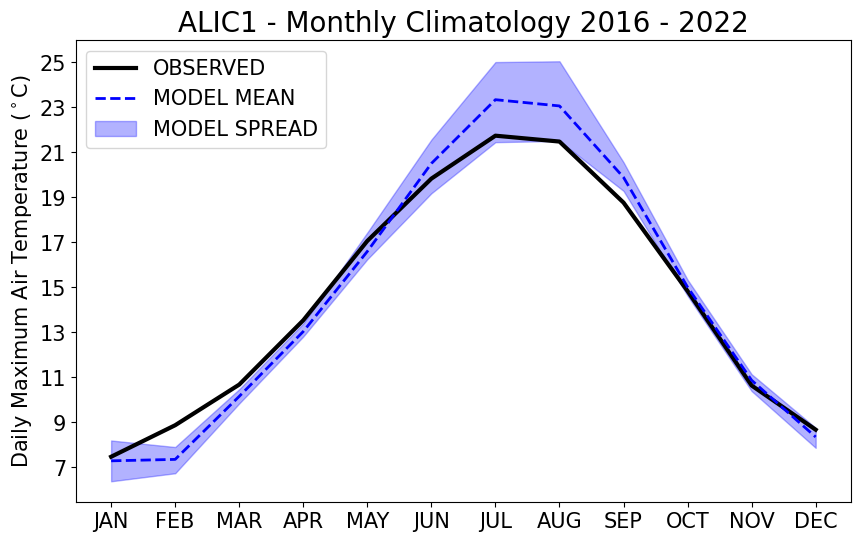

In [42]:
# Plotting monthly climatology of Daily Maximum Air Temperature from COSMOS station ALIC1 and nearest grid point on CHESS-SCAPE averaged over 2016--2022
fig = plt.figure(figsize=(10, 6))
plt.plot(months, df_site.values, color="k", lw=3, label="OBSERVED")
plt.plot(months, df_model_mn.values, color="b", ls="--", lw=2, label="MODEL MEAN")
plt.fill_between(
    months,
    df_model_min.values,
    df_model_max.values,
    color="b",
    alpha=0.3,
    label="MODEL SPREAD",
)
plt.ylabel("Daily Maximum Air Temperature ($^\circ$C)", fontsize=15)
plt.yticks(np.arange(7, 26, 2), fontsize=15)
plt.xticks(fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.title(site_nm + " - Monthly Climatology 2016 - 2022", fontsize=20)
plt.show()

## 2.3.4. Others

There are several other ways to access data remotely, and increasingly, most of these methods are supported by cloud-based infrastructure.  

  - Emerging cloud-native standards, such as the Spatiotemporal Asset Catalog (STAC), enable efficient cataloging and discovery of satellite or gridded climate data across distributed systems. These are often integrated with cloud platforms, allowing users to search and access data programmatically with minimal overhead. For example, [ECMWF Data Stores STAC Catalogue API](https://cds.climate.copernicus.eu/stac-browser/?.language=en).
  - Sensor Observation Services (SOS) are also available and are particularly useful for accessing real-time or near-real-time observations, especially from in-situ sensor networks or environmental monitoring platforms. For example, [UK AIR](https://uk-air.defra.gov.uk/data/data-availability).
  - Finally, platforms such as [Google Earth Engine (GEE)](https://developers.google.com/earth-engine/datasets) and other open data cube frameworks enable users to query and analyze massive gridded datasets remotely, leveraging built-in computational resources—eliminating the need to download data locally. The GEE platform offers [comprehensive tutorials](https://developers.google.com/earth-engine/guides/getstarted) that guide users through its functionality. You can find an [example notebook](https://github.com/eugmag/gee_python/tree/main) demonstrating how to derive drought indices using GEE and Python.

# Thank you! Come talk to us about what sort of data are you looking to download or access?